# Introdução ao experimento num Data Frame



#importando as bibliotecas

In [40]:
# Pandas
import pandas as pd

# Numpy
import numpy as np


In [41]:
# Construindo uma matriz representando todos os ensaios realizados.

ensaios = np.array([[-1,-1],[1,-1],[-1,1],[1,1]])
ensaios

array([[-1, -1],
       [ 1, -1],
       [-1,  1],
       [ 1,  1]])

In [42]:
# instalando a biblioteca pyDOE2
# !pip install pyDOE2

import pyDOE2 as doe

In [43]:
# Construindo um planejamento fatorial de 2^2 automaticamente pela biblioteca pyDOE2
ensaios = doe.ff2n(2)
ensaios

array([[-1., -1.],
       [ 1., -1.],
       [-1.,  1.],
       [ 1.,  1.]])

In [44]:
# Inserindo o planejamento em um Data Frame

experimento = pd.DataFrame(ensaios,columns=['Farinha','Chocolate'])
experimento

,Farinha,Chocolate
0,-1.0,-1.0
1,1.0,-1.0
2,-1.0,1.0
3,1.0,1.0


In [45]:
# Inserindo coluna com os resultados

experimento['Porcoes'] = [19,37,24,49]
experimento

,Farinha,Chocolate,Porcoes
0,-1.0,-1.0,19
1,1.0,-1.0,37
2,-1.0,1.0,24
3,1.0,1.0,49


# Analisando graficamente o experimento

In [46]:
# Analisando graficamente o experimento
import seaborn as sns
# paletas
sns.set_palette('terrain')
# estilo
sns.set_style('darkgrid')

## Para farinha

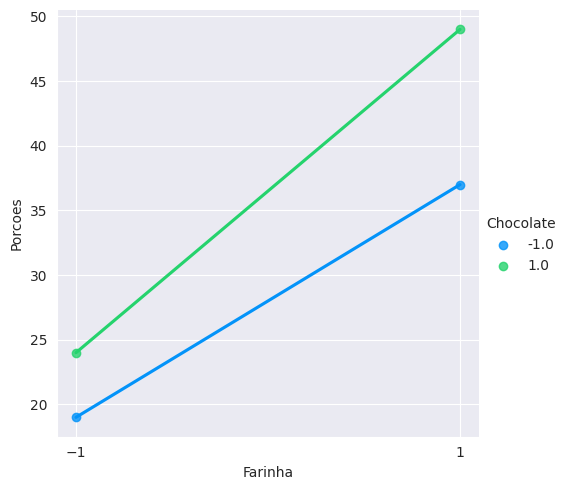

In [47]:
ax1 = sns.lmplot(data = experimento, x= 'Farinha', y='Porcoes', ci = None, hue = 'Chocolate')

ax1.set(xticks = (-1,1))

## Para o Chocolate

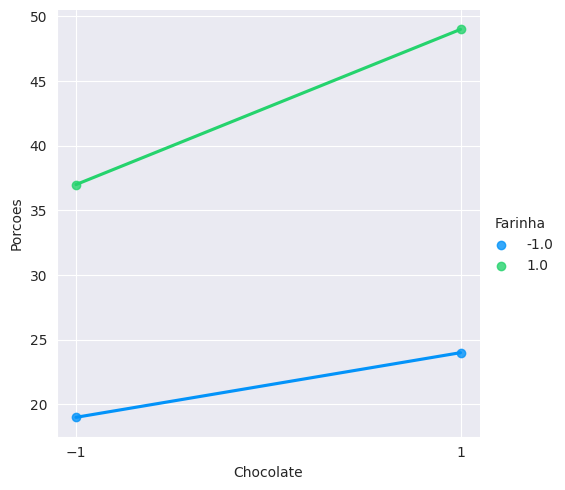

In [48]:
ax2 = sns.lmplot(data = experimento, x= 'Chocolate', y='Porcoes', ci = None, hue = 'Farinha')

ax2.set(xticks = (-1,1))

## Conclusão do experimento:


## 1 hipótese: o efeito de interação entre a Farinha e Chocolate são diretamente proporcional a quantidade produzida de Cupcakes na receita.

## 2 hipótese: Porém a farinha tem maior influência na quantidade de Cupcakes produzidos

# Comprovando as Hipóteses

## Ajustando o modelo estatístico
## Qual é efeito é mais importante na definição da quantidade de Cupcakes produzidos.
## Testando as hipóteses se existe ou não uma interação entre a Farinha e o Chocolate#

In [49]:
# biblioteca Stats Model
import statsmodels.api as sm

import statsmodels.formula.api as smf

## Interação da Farinha e Chocolate isoladamente + interação da farinha e chocolate juntos

In [50]:
modelo = smf.ols(data = experimento, formula = 'Porcoes ~ Farinha + Chocolate +  Farinha:Chocolate ')

In [51]:
modelo_ajustado = modelo.fit()

In [52]:
print (modelo_ajustado.summary())

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 07 Aug 2024   Prob (F-statistic):                nan
Time:                        13:50:05   Log-Likelihood:                    inf
No. Observations:                   4   AIC:                              -inf
Df Residuals:                       0   BIC:                              -inf
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            32.2500        na

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1796: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1796: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:958: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:50: RuntimeWarning: invalid value encountered in scalar divide
  dw =

# Calculando Modelo Estatístico - Graus de Liberdade dos Resíduos

n= numero de ensaios

p= numero de parâmetros no modelo

GLR = n - p

## Para fazer a análise estatística de significância dos parâmetros assim como avaliar os ajustes, o GLR deve ser maior de zero.  

## Aumentando os Graus de Liberdade
aumentando o numero de experimentos

In [53]:
centro = np.array([[0,0,29],
                   [0,0,30],
                   [0,0,29],
                   [0,0,30],])

In [54]:
centro_dataframe = pd.DataFrame(centro, columns = ['Farinha', 'Chocolate', 'Porcoes'], index= [4,5,6,7])

In [55]:
centro_dataframe

,Farinha,Chocolate,Porcoes
4,0,0,29
5,0,0,30
6,0,0,29
7,0,0,30


In [59]:
experimento = pd.concat([experimento, centro_dataframe], ignore_index=True)
experimento

,Farinha,Chocolate,Porcoes
0,-1.0,-1.0,19
1,1.0,-1.0,37
2,-1.0,1.0,24
3,1.0,1.0,49
4,0.0,0.0,29
5,0.0,0.0,30
6,0.0,0.0,29
7,0.0,0.0,30


# Teste de Significância estatística

In [60]:
modelo = smf.ols(data = experimento, formula ='Porcoes ~ Farinha + Chocolate + Farinha:Chocolate')

In [61]:
modelo_ajustado = modelo.fit()

In [62]:
print(modelo_ajustado.summary())

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     45.21
Date:                Wed, 07 Aug 2024   Prob (F-statistic):            0.00152
Time:                        14:08:56   Log-Likelihood:                -14.155
No. Observations:                   8   AIC:                             36.31
Df Residuals:                       4   BIC:                             36.63
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            30.8750      0.71

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  res = hypotest_fun_out(*samples, **kwds)


In [86]:
# pegando os valores t e o nome de suas variáveis
t_valores = modelo_ajustado.tvalues
t_valores

Intercept            43.494275
Farinha              10.708252
Chocolate             4.233495
Farinha:Chocolate     1.743204
dtype: float64

In [87]:
nome = t_valores.index.tolist()
nome

['Intercept', 'Farinha', 'Chocolate', 'Farinha:Chocolate']

## importando a biblioteca scipy para fazer o gráfico de pareto

In [88]:
from scipy import stats

In [89]:
distribuicao = stats.t(df = 4)

In [90]:
distribuicao.ppf(q = 1 - 0.025)

2.7764451051977987

In [91]:
limite = [distribuicao.ppf(q = 1 - 0.025)] * len(nome)

In [92]:
limite

[2.7764451051977987,
 2.7764451051977987,
 2.7764451051977987,
 2.7764451051977987]

# Plotando o gráfico

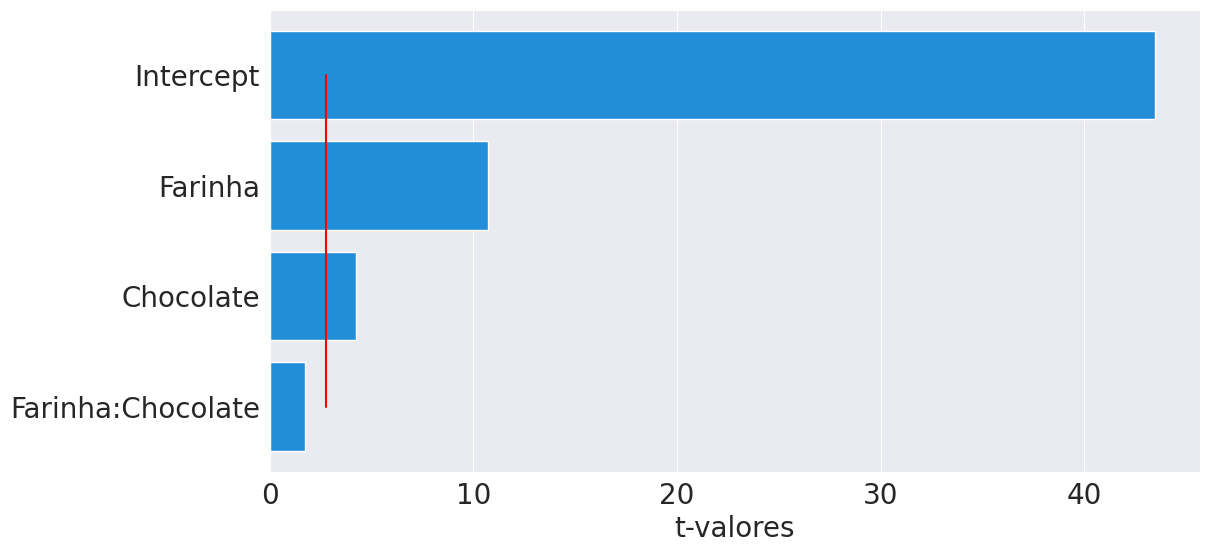

In [93]:
pareto = sns.barplot(x= t_valores, y=nome)

pareto.figure.set_size_inches(12,6)

pareto.tick_params(labelsize = 20)

pareto.set_xlabel('t-valores', fontsize = 20)

pareto.plot(limite,nome,'r')

## Conclusão:

## Através da análise do Gráfico de Pareto, podemos concluir que as variáveis Farinha e Chocolate são estatisticamente significativos, portanto, eles influenciam na quantidade de cupcakes isoladamentes.

## Porém a interação da Farinha:Chocolate não é estatisticamente significativo, ou seja, ele não influencia a quantidade de cupcakes.

# Modelo estatístico atualizado

In [94]:
modelo_2 = smf.ols(data = experimento, formula = 'Porcoes ~ Farinha + Chocolate')

In [95]:
modelo_ajustado_2 = modelo_2.fit()

In [97]:
print(modelo_ajustado_2.summary())

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     47.09
Date:                Wed, 07 Aug 2024   Prob (F-statistic):           0.000571
Time:                        15:23:39   Log-Likelihood:                -16.416
No. Observations:                   8   AIC:                             38.83
Df Residuals:                       5   BIC:                             39.07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.8750      0.842     36.658      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  res = hypotest_fun_out(*samples, **kwds)


# Gráfico Padronizado de Pareto do novo modelo

In [98]:
t_valores = modelo_ajustado_2.tvalues
t_valores

Intercept    36.658022
Farinha       9.025173
Chocolate     3.568092
dtype: float64

In [101]:
nome = t_valores.index.tolist()

In [102]:
nome

['Intercept', 'Farinha', 'Chocolate']

In [113]:
distribuicao = stats.t(df = 5)


In [114]:
distribuicao.ppf(q = 1 - 0.025)

2.570581835636314

In [118]:
limite = [distribuicao.ppf(q = 1- 0.025)] * len(nome)
limite

[2.570581835636314, 2.570581835636314, 2.570581835636314]

# Plotando o Gráfico

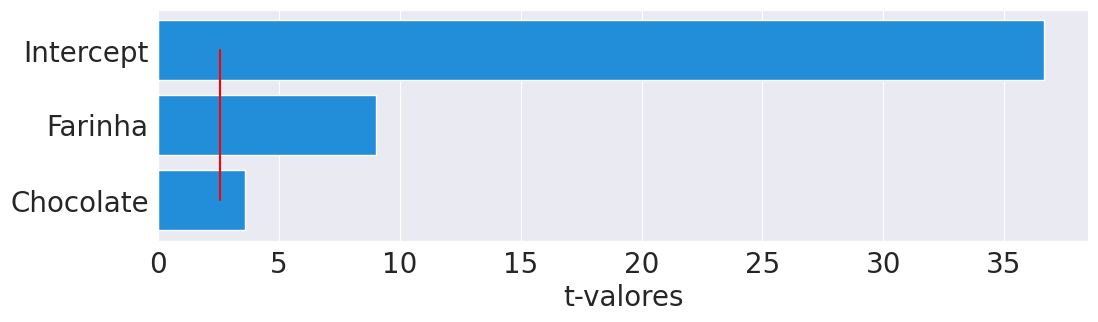

In [120]:
pareto = sns.barplot(x = t_valores, y= nome)

pareto.figure.set_size_inches(12,3)

pareto.tick_params(labelsize = 20)

pareto.set_xlabel('t-valores', fontsize=20)

pareto.plot(limite,nome,'r')


# Preditos por observados

In [124]:
observados = experimento['Porcoes']
observados

0    19
1    37
2    24
3    49
4    29
5    30
6    29
7    30
Name: Porcoes, dtype: int64

In [126]:
preditos = modelo_ajustado_2.predict()
preditos

array([15.875, 37.375, 24.375, 45.875, 30.875, 30.875, 30.875, 30.875])

In [127]:
import  matplotlib.pyplot as plt

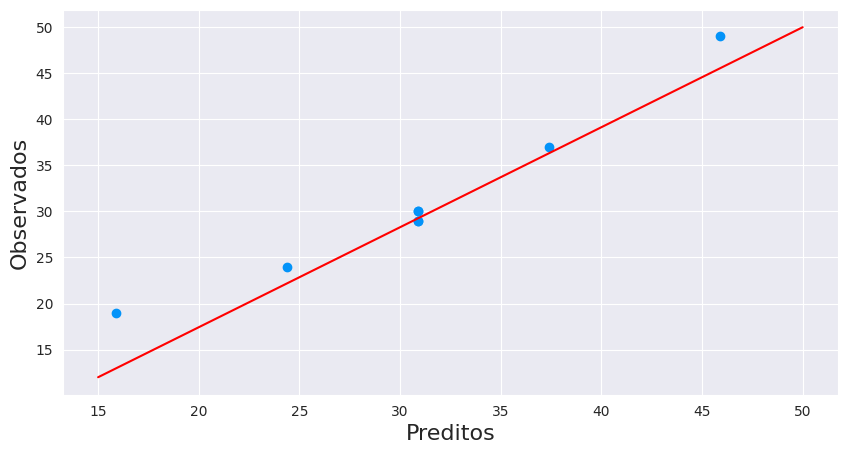

In [132]:
plt.figure(figsize = (10,5))
plt.xlabel('Preditos', fontsize = 16)
plt.ylabel('Observados', fontsize = 16)

#linha de guia
x = np.linspace(start = 15, stop = 50, num= 10)

y = np.linspace(start = 12, stop = 50, num = 10)

plt.plot(x,y,'r')

#comparação

plt.scatter(preditos,observados)



In [134]:
print(modelo_ajustado_2.summary())

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     47.09
Date:                Wed, 07 Aug 2024   Prob (F-statistic):           0.000571
Time:                        15:55:01   Log-Likelihood:                -16.416
No. Observations:                   8   AIC:                             38.83
Df Residuals:                       5   BIC:                             39.07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.8750      0.842     36.658      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  res = hypotest_fun_out(*samples, **kwds)
